# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Deden Muhamad Furqon
- **Email:** furqoncreative24@gmail.com
- **ID Dicoding:** furqoncreative

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang menghasilkan pendapatan tertinggi dan volume penjualan terbanyak?
- Bagaimana kinerja pendapatan dan volume penjualan berdasarkan lokasi (kota) geografis penjual?

## Import Semua Packages/Library yang Digunakan

In [81]:
from unicodedata import category

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Proses pertama dari data wrangling adalah mengumpulkan data yang akan digunakan untuk analisis. Data yang akan digunakan adalah:
- Olist Product Dataset
- Olist Order Items Dataset
- Product Category Name Translation
- Olist Seller Dataset

In [82]:
# Mengambil olist product dataset menjadi dataframe
olist_product_df = pd.read_csv('data/olist_products_dataset.csv')
olist_product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [83]:
# Mengambil olist order items dataset menjadi dataframe
olist_order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
olist_order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [84]:
# Mengambil product category name translation menjadi dataframe
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [85]:
# Mengambil olist seller dataset menjadi dataframe
olist_seller_df = pd.read_csv('data/olist_sellers_dataset.csv')
olist_seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [86]:
# Mengambil olist order dataset menjadi dataframe
olist_orders_df = pd.read_csv('data/olist_orders_dataset.csv')
olist_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight:**

Olist Product Dataset
- Dataset ini berisi data produk seperti ID, ukuran, kategori dan harga.
- Dataset ini dapat digunakan untuk menganalisis pertanyaan pertama dengan adanya data kategori dan harga di dalamnya.

Olist Order Item Dataset
- Dataset ini berisi data item penjualan seperti ID produk, ID penjualan, dan harga total transaksi
- Dataset ini dapat digunakan untuk menganalisis pertanyaan pertama dan kedua dengan adanya data asosiasi antara ID produk, ID penjual, dan total transaksinya.

Product Category Name Translation
- Dataset ini berisi data kategori dan terjemahannya dalam bahasa inggris.
- Dataset ini originalnya berasal dari Brazil dan menggunakan bahasa Portugis, Sehingga penting mengetahui transalisnya dalam bahasa inggris agar proses analisisnya lebih mudah.

Olist Seller Dataset
- Dataset ini berisi data penjual seperti ID, nama, alamat, dan telepon.
- Dataset ini dapat digunakan untuk menganalisis pertanyaan kedua dengan adanya data geografis penjual.

Olist Order Dataset
- Dataset ini berisi data transaksi penjualan seperti ID, ID penjual, ID produk, dan total transaksi.
- Dataset ini dapat digunakan untuk analisis lanjutan, yaitu RFM Analysis.

### Assessing Data

Tahap kedua dari data wragling adata assesing data, yaitu mengetahui apakah data yang diberikan sudah lengkap dan tidak ada data kosong atau duplikat.

Assessing Olist Product Dataset

In [87]:
# Melihat struktur data Olist Product Dataset
olist_product_df.info()

# Memeriksa jumlah missing values disetiap kolom
olist_product_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [88]:
# Mengecek jumlah data duplikat disetiap kolom
print("Jumlah data duplikat:")
olist_product_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

Assessing Olist Order Items Dataset

In [89]:
# Melihat struktur data Olist Order Items Dataset
olist_order_items_df.info()

# Memeriksa jumlah missing values disetiap kolom
olist_order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [90]:
# Mengecek jumlah data duplikat disetiap kolom
print("Jumlah data duplikat:")
olist_order_items_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

Assessing Product Category Name Translation Dataset

In [91]:
# Melihat struktur data Product Category Name Translation Dataset
product_category_name_translation.info()

# Memeriksa jumlah missing values disetiap kolom
product_category_name_translation.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [92]:
# Mengecek jumlah data duplikat disetiap kolom
print("Jumlah data duplikat:")
product_category_name_translation.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

Assessing Olist Seller Dataset

In [93]:
# Melihat struktur data Olist Seller Dataset
olist_seller_df.info()

# Memeriksa jumlah missing values disetiap kolom
olist_seller_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [94]:
# Mengecek jumlah data duplikat disetiap kolom
print("Jumlah data duplikat:")
olist_seller_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

Assesing Olist Order Dataset

In [95]:
# Melihat struktur data Olist Order Dataset
olist_orders_df.info()

# Memeriksa jumlah missing values disetiap kolom
olist_orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [96]:
# Mengecek jumlah duplikat data di setiap kolom
print("Jumlah data duplikat:")
olist_orders_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

**Insight:**

Olist Product Dataset:
- Missing values ditemukan pada beberapa kolom: product_weight_g (2), product_length_cm (2), product_height_cm (2), product_width_cm (2), dan product_category_name (610)
- Dataset ini memiliki 32.951 baris dan 9 kolom
- Kolom penting untuk analisis: product_id, product_category_name, dimensi produk, dan berat produk
- Terdapat outlier pada kolom dimensi dan berat produk

Olist Order Items Dataset:
- Dataset bersih tanpa missing values
- Dataset ini memiliki 112.650 baris dan 7 kolom
- Kolom penting untuk analisis: order_id, seller_id, price, freight_value

Product Category Name Translation Dataset:
- Dataset bersih tanpa missing values
- Dataset ini memiliki 71 baris dan 2 kolom
- Kolom berisi kategori dalam bahasa portugis dan terjemahannya dalam bahasa inggris
- Dataset ini penting untuk translasi kategori produk

Olist Seller Dataset:
- Dataset bersih tanpa missing values
- Dataset ini memiliki 3.095 baris dan 4 kolom
- Kolom penting untuk analisis: seller_id, seller_city, seller_state
- Data lokasi penjual terdistribusi di berbagai kota dan negara bagian

Olist Order Dataset
- Terdapat missing values pada beberapa kolom: order_approved_at (160), order_delivered_carrier_date (1783), order_delivered_customer_date (2965)
- Dataset ini memiliki 99.441 baris dan 8 kolom.
- Kolom penting pada dataset ini adalah asosiasi antara order_id dan customer_id untuk kebuthan RFM analisis.



### Cleaning Data

Tahap ketiga dari data wrangling adalah membersihkan data yang tidak diperlukan untuk analisis. Berdasarkan hasil assesing data, hanya olist product dataset yang memiliki missing values. Sehingga pada tahap ini hanya dilakukan pembersihan data pada olist product dataset.

Cleangin Olist Product Dataset

Dari hasil assesing data, ditemukan bahwa kolom product_name_lenght, product_description_lenght, product_weight_g, product_photos_qty, product_length_cm, product_height_cm, dan product_width_cm, dan product_length_cm memiliki missing values. Oleh karena itu, kolom tersebut akan dihapus karena tidak diperlukan untuk analisis.

In [97]:
# Menghapus kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
olist_product_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_height_cm', 'product_width_cm', 'product_length_cm'], inplace=True)

In [98]:
olist_product_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

Sementara untuk kolom product_category_name, terdapat missing values pada 610 baris. Namun, kolom ini diperlukan untuk analisis sehingga proses pembersihannya menggunakan teknik imputasi. Imputasi yang digunakan adalah menggunakan kategori produk baru, yaitu uncategorized.

In [99]:
olist_product_df['product_category_name'] = olist_product_df['product_category_name'].fillna('uncategorized')

In [100]:
# Verifikasi missing values setelah pembersihan data.
print("Missing values after cleaning:")
print(olist_product_df.isna().sum())


Missing values after cleaning:
product_id               0
product_category_name    0
dtype: int64


Cleaning Olist Order Dataset

Pada dataset olist order dataset, terdapat missing values pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Oleh karena itu, kolom tersebut akan dihapus karena tidak diperlukan untuk analisis.

In [101]:
# Menghapus kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
olist_orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [102]:
# Verifikasi missing values setelah pembersihan data.
print("Missing values after cleaning:")
print(olist_orders_df.isna().sum())

Missing values after cleaning:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64


**Insight:**
- Dilakukan pembersihan data pada dataset olist order item dengan menghapus kolom-kolom yang tidak diperlukan untuk analisis (product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_height_cm, product_width_cm product_length_cm)
- Dilakukan pembersihan pada kolom-kolom yang memiliki missing values di dataset olist order seperti kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.
- Tidak data kosong ataupun duplikat pada datasete lainnya, sehingga tidak ada yang perlu dibersihkan.


## Exploratory Data Analysis (EDA)

Setelah proses data wragling selesai, tahap selanjutnya adalah melakukan analisis exploratory data analysis (EDA). EDA adalah proses penelusuran dan pemodelan data untuk mengetahui apakah data yang diberikan memiliki kesan yang sesuai dengan tujuan analisis.

### Explore Olist Products & Product Category Name

Yang pertama dilakukan adalah melakukan explore pada dataset olist product dan product category name translation. Ini bertujuan untuk mengetahui informasi statistik deskriptif pada produk yang dikelompokan berdasarkan kategori dan juga transalsinya.

In [103]:
# Menggabungkan data product category name translation dengan data olist product
merged_olist_product = olist_product_df.merge(product_category_name_translation, on='product_category_name')

# Melihat statistik deskriptif pada dataframe hasil gabungan antara data olist product dan product category name translation
merged_olist_product.describe(include='all')

,product_id,product_category_name,product_category_name_english
count,32328,32328,32328
unique,32328,71,71
top,106392145fca363410d287a815be6de4,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


### Explore Olist Order Items & Olist Product

Selanjutnya dilakukan analisis exploratory data analysis pada dataset olist order items dan olist product. Ini bertujuan untuk mengetahui informasi statistik deskriptif pada transaksi penjualan dengan tambahan informasi detail produknya. Kemudian dilakukan analisis untuk mengetahui kategori produk yang memiliki pendapatan tertinggi dan volume penjualan terbanyak.

In [104]:
# Menggabungkan data olist order items dengan data olist product
merged_olist_order_items = olist_order_items_df.merge(merged_olist_product, on='product_id')

# Melihat statistik deskriptif pada dataframe hasil gabungan antara data olist order items dan olist product
merged_olist_order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
count,111023,111023.000000,111023,111023,111023,111023.000000,111023.000000,111023,111023
unique,97256,NaN,32328,3033,92053,NaN,NaN,71,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115
mean,NaN,1.198229,NaN,NaN,NaN,120.755104,20.025548,NaN,NaN
std,NaN,0.706931,NaN,NaN,NaN,183.372746,15.841472,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,NaN


In [105]:
# Menghitung category metrics, yaitu pendapatan dan volume penjualan berdasarkan kategori.
category_metrics = merged_olist_order_items.groupby('product_category_name_english').agg({
    'price': ['sum', 'count']
}).reset_index()

# Mengubah nama kolom menjadi category, revenue, dan sales_volume
category_metrics.columns = ['category', 'revenue', 'sales_volume']

In [106]:
# Memndapatkan top 10 kategori berdasarkan pendapatan
revenue_top = category_metrics.nlargest(10, 'revenue')

# Menampilkan top 10 kategori berdasarkan pendapatan
revenue_top.head(10)

,category,revenue,sales_volume
43,health_beauty,1258681.34,9670
70,watches_gifts,1205005.68,5991
7,bed_bath_table,1036988.68,11115
65,sports_leisure,988048.97,8641
15,computers_accessories,911954.32,7827
39,furniture_decor,729762.49,8334
20,cool_stuff,635290.85,3796
49,housewares,632248.66,6964
5,auto,592720.11,4235
42,garden_tools,485256.46,4347


In [107]:
# Memndapatkan top 10 kategori berdasarkan volume penjualan
volume_top = category_metrics.nlargest(10, 'sales_volume')

# Menampilkan top 10 kategori berdasarkan volume penjualan
volume_top.head(10)

,category,revenue,sales_volume
7,bed_bath_table,1036988.68,11115
43,health_beauty,1258681.34,9670
65,sports_leisure,988048.97,8641
39,furniture_decor,729762.49,8334
15,computers_accessories,911954.32,7827
49,housewares,632248.66,6964
70,watches_gifts,1205005.68,5991
68,telephony,323667.53,4545
42,garden_tools,485256.46,4347
5,auto,592720.11,4235


### Explore Olist Seller

Terakhir adalah analisis exploratory data analysis pada dataset olist seller. Ini bertujuan untuk mengetahui informasi statistik deskriptif pada data penjual. Dengan proses ini, dapat dilihat lokasi penjual yang memiliki kinerja yang tinggi.

In [108]:
olist_seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [109]:
# Menggabungkan data olist seller dengan data penggabungan sebelumnya
merged_olist_seller = merged_olist_order_items.merge(olist_seller_df, on='seller_id')

# Melihat statistik deskriptif pada dataframe hasil gabungan antara data olist seller dan dan gabungan dataframe sebelumnya
merged_olist_seller.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,111023,111023.000000,111023,111023,111023,111023.000000,111023.000000,111023,111023,111023.000000,111023,111023
unique,97256,NaN,32328,3033,92053,NaN,NaN,71,71,NaN,604,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,bed_bath_table,NaN,sao paulo,SP
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115,NaN,27767,79164
mean,NaN,1.198229,NaN,NaN,NaN,120.755104,20.025548,NaN,NaN,24501.129180,NaN,NaN
std,NaN,0.706931,NaN,NaN,NaN,183.372746,15.841472,NaN,NaN,27646.694677,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,1001.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,6429.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN,NaN,13660.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,NaN,28470.000000,NaN,NaN


In [110]:
# Menghitung seller city metrics, yaitu pendapatan dan volume penjualan berdasarkan kota penjual.
seller_city_metrics = merged_olist_seller.groupby('seller_city').agg({
    'price': ['sum', 'count']
}).reset_index()

# Mengubah nama kolom menjadi city, revenue, dan sales_volume
seller_city_metrics.columns = ['city', 'revenue', 'sales_volume']

In [111]:
# Memndapatkan top 10 kota penjual berdasarkan pendapatan
seller_city_revenue_top = seller_city_metrics.nlargest(10, 'revenue')

# Menampilkan top 10 kota penjual berdasarkan pendapatan
seller_city_revenue_top.head(10)

,city,revenue,sales_volume
511,sao paulo,2673549.42,27767
225,ibitinga,622324.13,7733
158,curitiba,460364.27,2983
444,rio de janeiro,345923.02,2374
219,guarulhos,279139.81,1975
436,ribeirao preto,273828.06,2245
256,itaquaquecetuba,230568.12,1653
217,guariba,229472.63,1156
477,santo andre,228441.90,2961
297,lauro de freitas,225525.05,411


In [112]:
# Memndapatkan top 10 kota penjual berdasarkan volume penjualan
seller_city_revenue_top = seller_city_metrics.nlargest(10, 'sales_volume')

# Menampilkan top 10 kota penjual berdasarkan volume penjualan
seller_city_revenue_top.head(10)

,city,revenue,sales_volume
511,sao paulo,2673549.42,27767
225,ibitinga,622324.13,7733
158,curitiba,460364.27,2983
477,santo andre,228441.90,2961
501,sao jose do rio preto,194330.38,2573
63,belo horizonte,203398.29,2515
444,rio de janeiro,345923.02,2374
436,ribeirao preto,273828.06,2245
322,maringa,207209.93,2218
219,guarulhos,279139.81,1975


## Visualization & Explanatory Analysis

Tahap terakhir dari proses analisis data ini adalah melakukan visualisasi dan analisis explanatory data analysis. Visualisasi yang dilakukan adalah untuk menjawab dua pertanyaan yang sudah didefinisikan pada tahap awal.

### Pertanyaan 1: Kategori produk apa yang menghasilkan pendapatan tertinggi dan volume penjualan terbanyak?

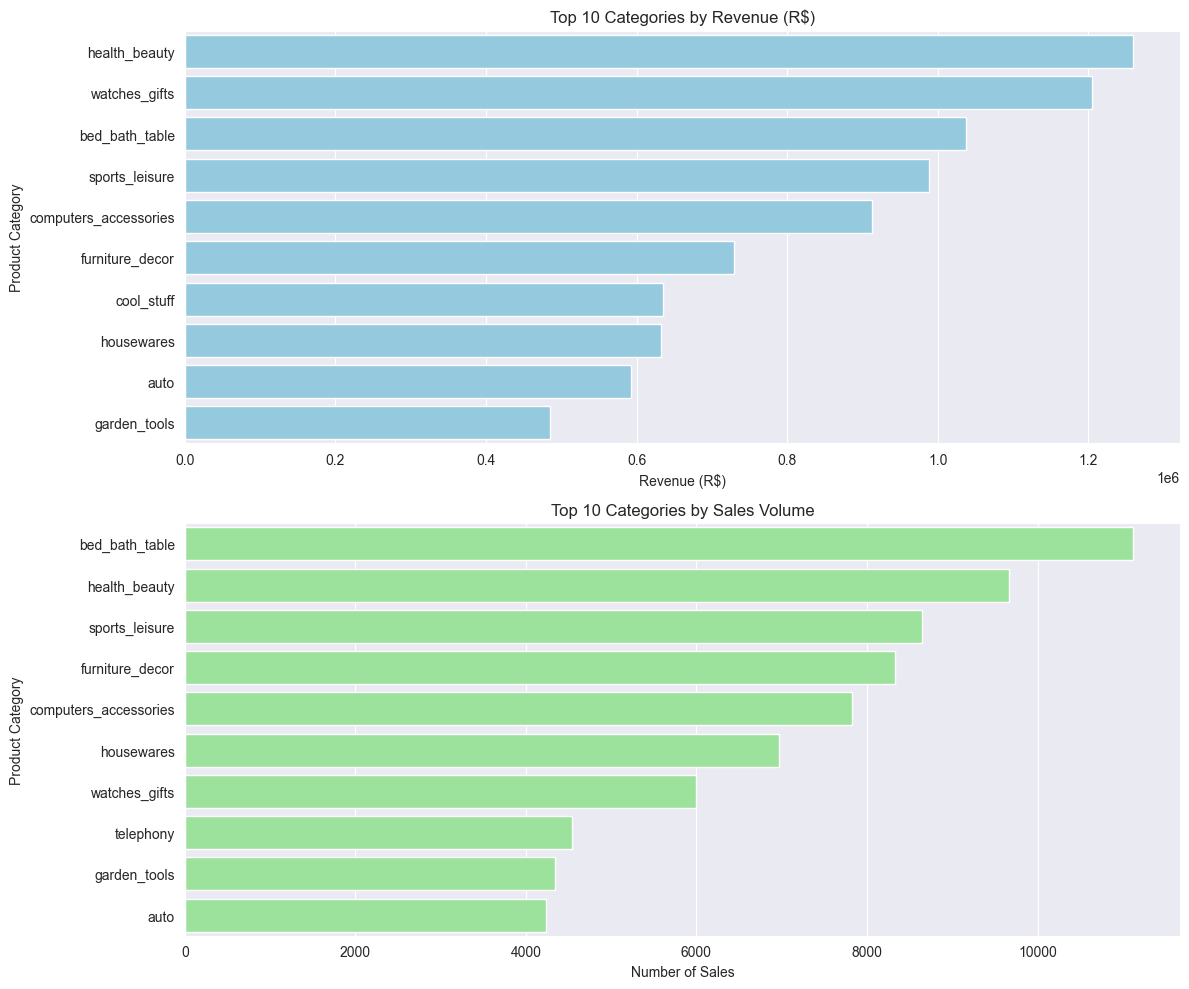

In [113]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(data=revenue_top, x='revenue', y='category', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Categories by Revenue (R$)')
ax1.set_xlabel('Revenue (R$)')
ax1.set_ylabel('Product Category')

sns.barplot(data=volume_top, x='sales_volume', y='category', ax=ax2, color='lightgreen')
ax2.set_title('Top 10 Categories by Sales Volume')
ax2.set_xlabel('Number of Sales')
ax2.set_ylabel('Product Category')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana kinerja pendapatan dan volume penjualan berdasarkan lokasi (kota) geografis penjual?

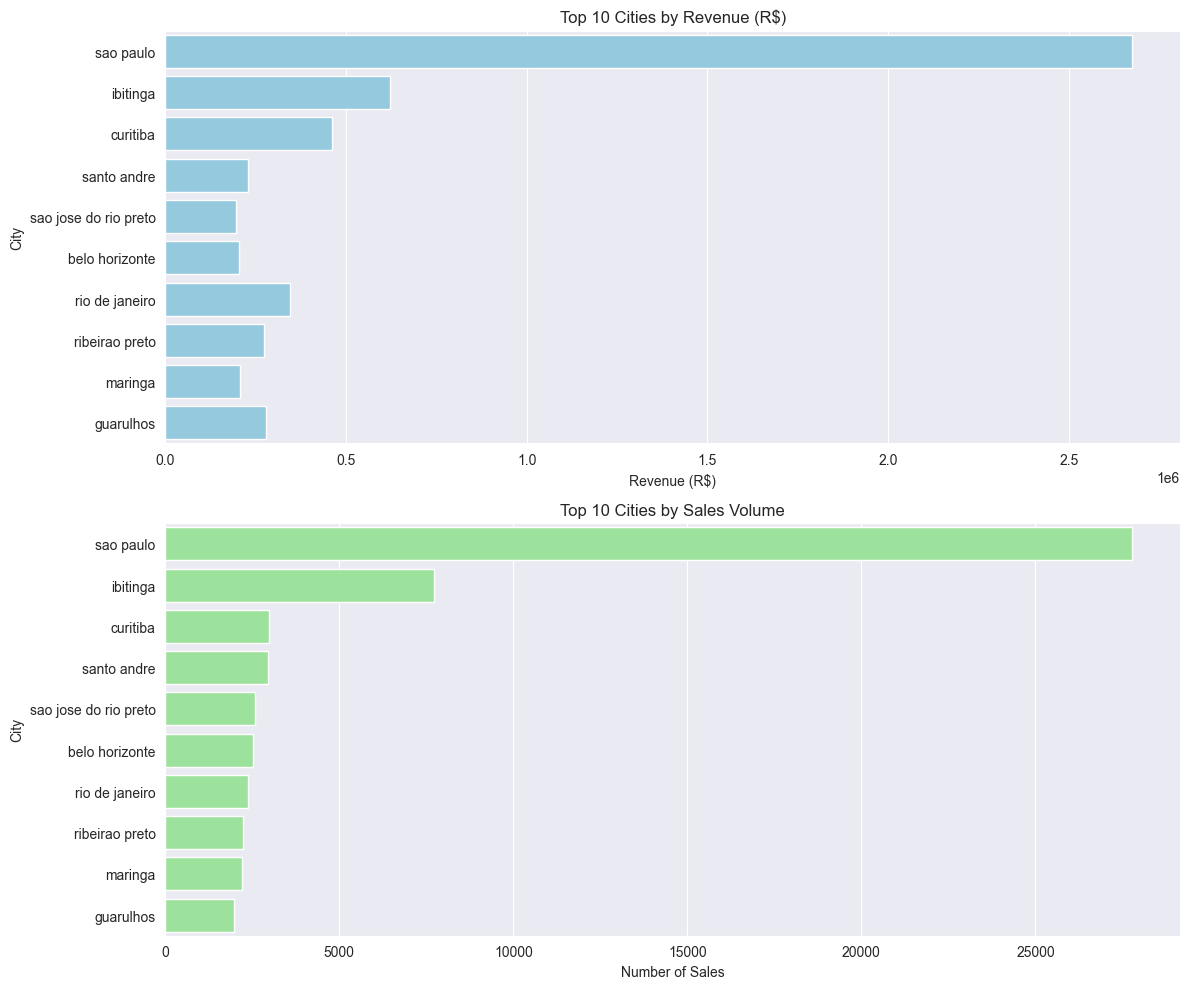

In [114]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(data=seller_city_revenue_top.head(10), x='revenue', y='city', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Cities by Revenue (R$)')
ax1.set_xlabel('Revenue (R$)')
ax1.set_ylabel('City')

sns.barplot(data=seller_city_revenue_top.head(10), x='sales_volume', y='city', ax=ax2, color='lightgreen')
ax2.set_title('Top 10 Cities by Sales Volume')
ax2.set_xlabel('Number of Sales')
ax2.set_ylabel('City')

plt.tight_layout()
plt.show()


**Insight:**

1. Kategori produk yang menghasilkan pendapatan tertinggi dan volume penjualan terbanyak:
- Kategori Health & Beauty menghasilkan pendapatan tertinggi sekitar R\$ 1.25M, diikuti oleh Watches & Gifts (R\$ 1.20M) dan Bed Bath Table (R\$ 1.03M)
- Untuk volume penjualan, kategori Bed Bath Table memimpin dengan 11,115 penjualan, diikuti oleh Health & Beauty (9,670) dan Sports & Leisure (8,641)
- Hal ini menunjukkan bahwa meskipun Bed Bath Table memiliki volume penjualan tertinggi, harga per unitnya lebih rendah dibanding Health & Beauty

2. Kinerja pendapatan dan volume penjualan berdasarkan kota:
- São Paulo secara signifikan mendominasi baik dari sisi pendapatan (R\$ 2.67M) maupun volume penjualan (27,767)
- Ibitinga berada di posisi kedua dengan pendapatan R\$ 622K dan 7,733 penjualan
- Curitiba di posisi ketiga dengan pendapatan R\$ 460K dan 2,983 penjualan


## Analisis Lanjutan (Opsional) : RFM Analysis

Sebagai analisis tambahan, dilakukan analisis RFM (Recency, Frequency, Monetary Value) untuk mengetahui kinerja penjualan.

RFM adalah metode untuk mengetahui kinerja penjualan. Metode ini menggunakan kriteria-kriteria berikut:
- Recency: Jangka waktu yang telah terjadi sejak transaksi terakhir
- Frequency: Jumlah transaksi dalam jangka waktu tersebut
- Monetary Value: Total pendapatan dalam jangka waktu tersebut

In [115]:
# Menggabungkan semua dataframe sebelumnya
all_df = merged_olist_seller.merge(olist_orders_df, on='order_id')

# Melihat statistik deskriptif pada dataframe hasil gabungan semua dataframe sebelumnya
all_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
count,111023,111023.000000,111023,111023,111023,111023.000000,111023.000000,111023,111023,111023.000000,111023,111023,111023,111023,111023,111023
unique,97256,NaN,32328,3033,92053,NaN,NaN,71,71,NaN,604,23,97256,7,96721,450
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,bed_bath_table,NaN,sao paulo,SP,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-12-20 00:00:00
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115,NaN,27767,79164,21,108638,21,601
mean,NaN,1.198229,NaN,NaN,NaN,120.755104,20.025548,NaN,NaN,24501.129180,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.706931,NaN,NaN,NaN,183.372746,15.841472,NaN,NaN,27646.694677,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,6429.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN,NaN,13660.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,NaN,28470.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00
...,...,...,...,...
97251,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,1,78.00
97252,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,54.90
97253,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,47.90
97254,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,199.90


In [117]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = pd.to_datetime(olist_orders_df["order_purchase_timestamp"]).dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


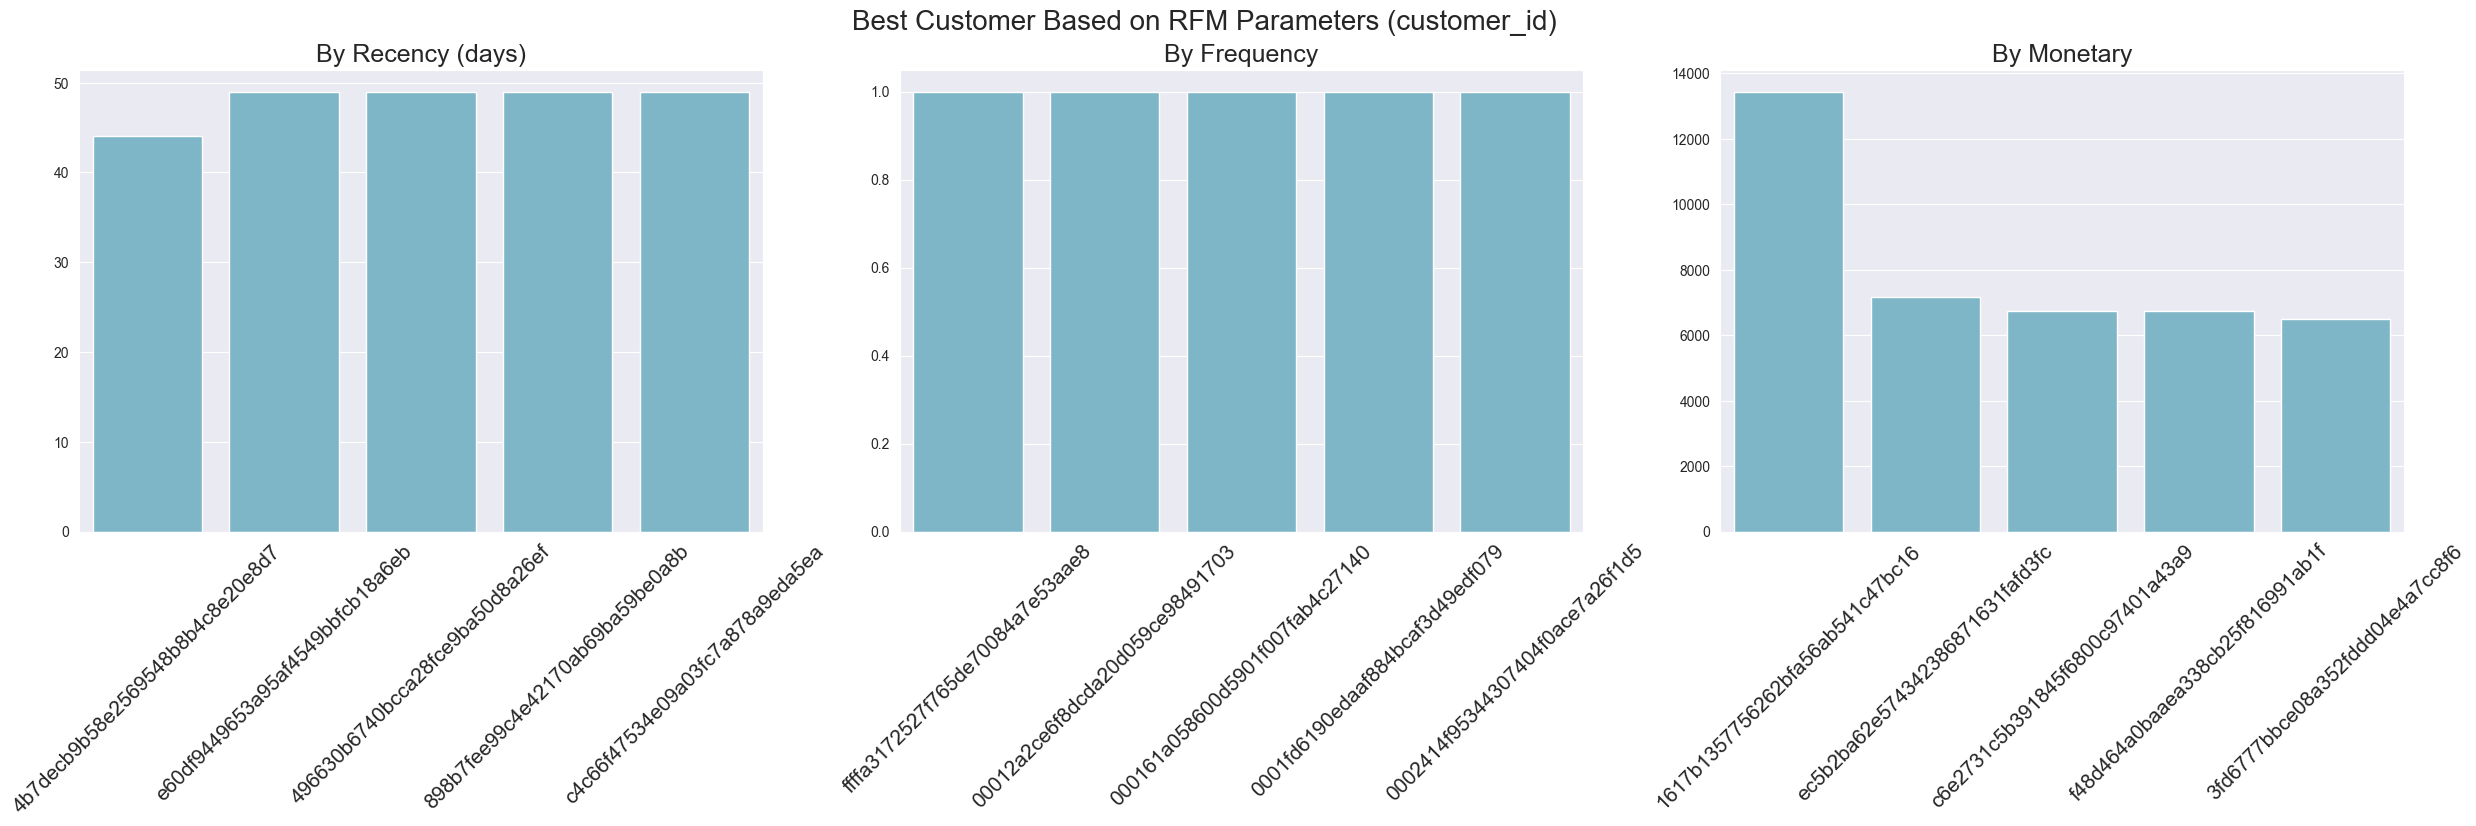

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5),
            hue="customer_id", palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            hue="customer_id", palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            hue="customer_id", palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

Berdasarkan analisis yang telah dilakukan, dapat ditarik beberapa kesimpulan:

1. Kategori Produk dengan Kinerja Tertinggi:
   - Health & Beauty menghasilkan pendapatan tertinggi (R$ 1.25M), diikuti Watches & Gifts (R$ 1.20M) dan Bed Bath Table (R$ 1.03M)
   - Bed Bath Table memimpin volume penjualan dengan 11,115 transaksi, diikuti Health & Beauty (9,670) dan Sports & Leisure (8,641)
   - Meskipun Bed Bath Table memiliki volume penjualan tertinggi, Health & Beauty menghasilkan pendapatan lebih tinggi karena harga per unit yang lebih mahal

2. Kinerja Berdasarkan Lokasi Penjual:
   - São Paulo mendominasi baik dari sisi pendapatan (R$ 2.67M) maupun volume penjualan (27,767)
   - Terdapat kesenjangan yang signifikan antara São Paulo dengan kota-kota lainnya
   - Ibitinga dan Curitiba berada di posisi kedua dan ketiga, namun dengan selisih yang cukup jauh dari São Paulo
   - Konsentrasi aktivitas e-commerce sangat tinggi di ibu kota dibandingkan kota-kota lainnya


# Apendix

Export All Data to CSV (For Dasboard)

In [119]:
all_df.to_csv('dashboard/all_data.csv', index=False)